In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [170]:
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw

In [171]:
df = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/px4_odom.csv')
# df = df[df['timestamp_us'] < 1e12]
# display(df)
df[['roll', 'pitch', 'yaw']] = df.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
df

,timestamp_us,px,py,pz,qw,qx,qy,qz,yaw_imu,yaw_slam,roll,pitch,yaw
0,18704573,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0,0,0.000000,0.000000,0.000000e+00
1,18712565,0.000000,0.000000,0.000000,1.000000,-0.000211,0.000777,2.186660e-08,0,0,-0.000422,0.001554,-2.844468e-07
2,18720557,0.000000,0.000000,0.000000,1.000000,0.000070,0.000033,1.511190e-07,0,0,0.000139,0.000065,3.067813e-07
3,18728551,0.071397,0.001096,-0.003945,1.000000,0.000069,0.000839,2.394790e-07,0,0,0.000139,0.001678,5.953806e-07
4,18736564,0.074910,0.001149,-0.004139,1.000000,0.000113,0.000047,2.594460e-07,0,0,0.000225,0.000094,5.294311e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,121332031,-1.419840,-0.046382,-0.437176,-0.329455,-0.466338,-0.286651,7.692980e-01,0,0,-0.322182,1.134642,-2.538697e+00
2766,121339940,-1.420140,-0.046516,-0.436835,-0.371195,-0.406533,-0.281056,7.861000e-01,0,0,-0.267301,1.011831,-2.407974e+00
2767,122345779,-1.457620,-0.063583,-0.393494,-0.410922,-0.342644,-0.272079,7.998190e-01,0,0,-0.243978,0.881530,-2.307922e+00
2768,123351306,-1.495090,-0.080645,-0.350166,-0.448371,-0.275777,-0.258132,8.101100e-01,0,0,-0.234776,0.745443,-2.222742e+00


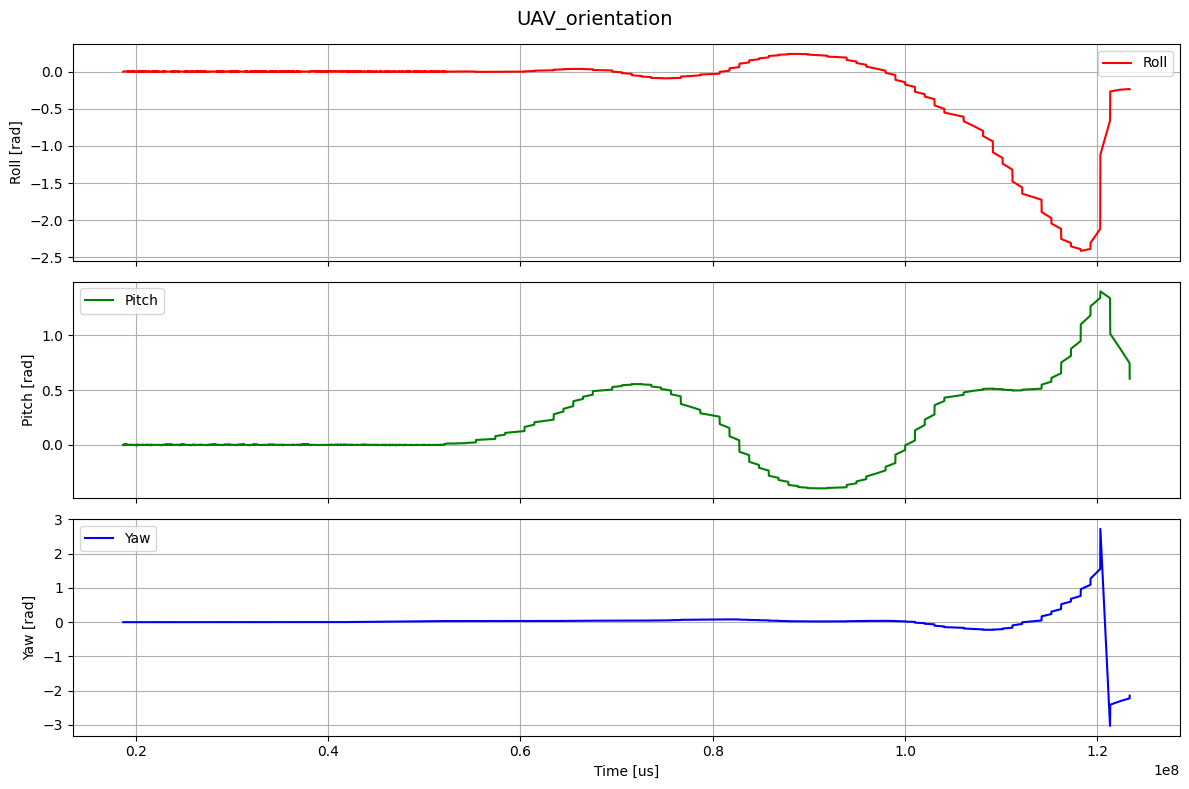

In [172]:
fig, (ax_roll, ax_pitch, ax_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_roll.plot(df['timestamp_us'], df['roll'], label='Roll', color='r')
ax_roll.set_ylabel("Roll [rad]")
ax_roll.grid(True)
ax_roll.legend()

# Pitch
ax_pitch.plot(df['timestamp_us'], df['pitch'], label='Pitch', color='g')
ax_pitch.set_ylabel("Pitch [rad]")
ax_pitch.grid(True)
ax_pitch.legend()

# Yaw
ax_yaw.plot(df['timestamp_us'], df['yaw'], label='Yaw', color='b')
ax_yaw.set_xlabel("Time [us]")
ax_yaw.set_ylabel("Yaw [rad]")
ax_yaw.grid(True)
ax_yaw.legend()

# タイトルを全体に
fig.suptitle("UAV_orientation", fontsize=14)

plt.tight_layout()
plt.show()

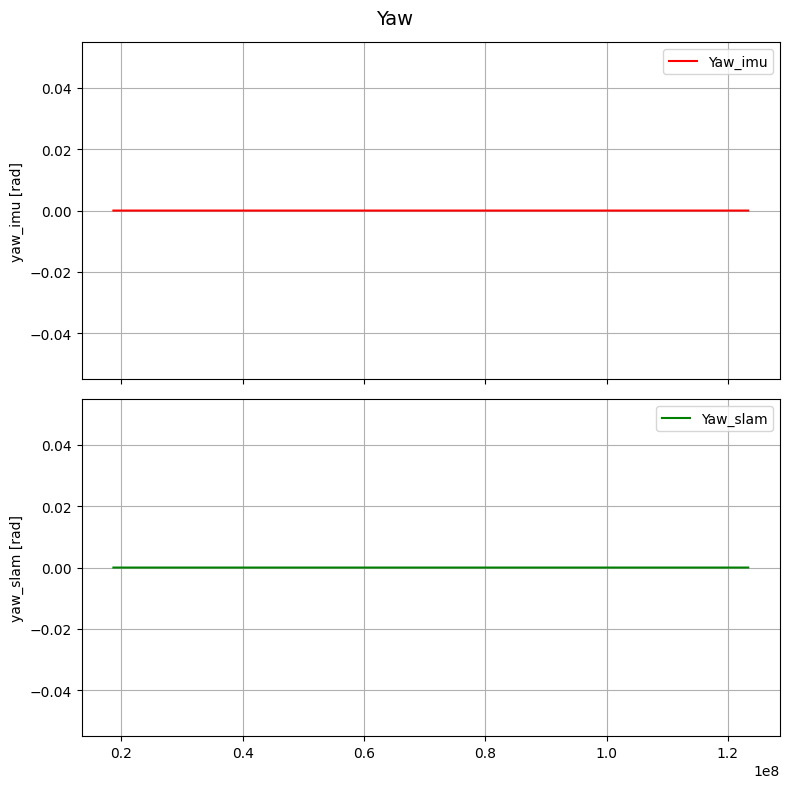

In [173]:
fig, (ax_imuy, imus) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax_imuy.plot(df['timestamp_us'], df['yaw_imu'], label='Yaw_imu', color='r')
ax_imuy.set_ylabel("yaw_imu [rad]")
ax_imuy.grid(True)
ax_imuy.legend()

imus.plot(df['timestamp_us'], df['yaw_slam'], label='Yaw_slam', color='g')
imus.set_ylabel("yaw_slam [rad]")
imus.grid(True)
imus.legend()

# タイトルを全体に
fig.suptitle("Yaw", fontsize=14)

plt.tight_layout()
plt.show()

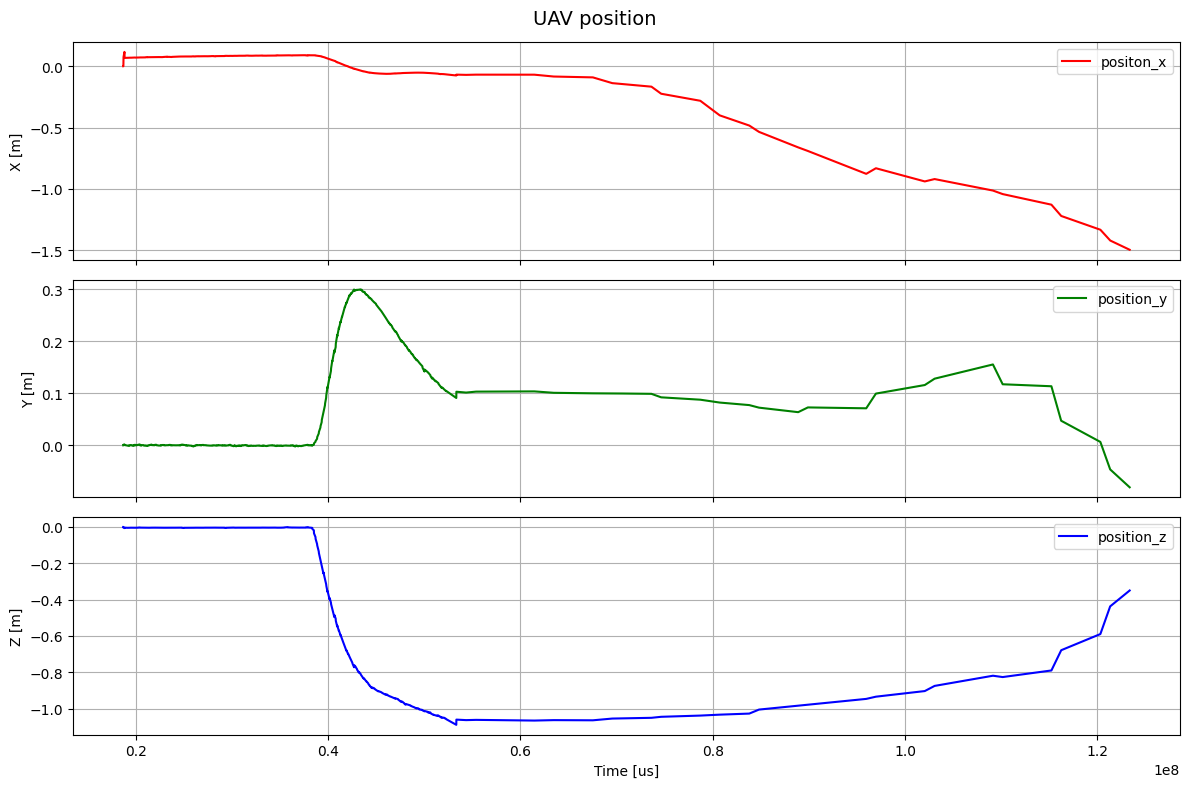

In [174]:
fig, (ax_px, ax_py, ax_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax_px.plot(df['timestamp_us'], df['px'], label='positon_x', color='r')
ax_px.set_ylabel("X [m]")
ax_px.grid(True)
ax_px.legend()

# Pitch
ax_py.plot(df['timestamp_us'], df['py'], label='position_y', color='g')
ax_py.set_ylabel("Y [m]")
ax_py.grid(True)
ax_py.legend()
def quat_to_euler(x, y, z, w):
    t0 = 2.0 * (w * x + y * z)
    t1 = 1.0 - 2.0 * (x * x + y * y)
    roll = np.arctan2(t0, t1)

    t2 = 2.0 * (w * y - z * x)
    t2 = 1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch = np.arcsin(t2)

    t3 = 2.0 * (w * z + x * y)
    t4 = 1.0 - 2.0 * (y * y + z * z)
    yaw = np.arctan2(t3, t4)

    return roll, pitch, yaw
# Yaw
ax_pz.plot(df['timestamp_us'], df['pz'], label='position_z', color='b')
ax_pz.set_xlabel("Time [us]")
ax_pz.set_ylabel("Z [m]")
ax_pz.grid(True)
ax_pz.legend()

# タイトルを全体に
fig.suptitle("UAV position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,1759137186174,0.062066,-0.033950,0.126088,0.718620,-0.006967,-0.008852,0.695312,-0.022326,-0.003034,1.537865
1,1759137186182,0.062087,-0.033968,0.126418,0.718626,-0.006963,-0.008842,0.695306,-0.022306,-0.003026,1.537847
2,1759137186190,0.062108,-0.033987,0.126772,0.718636,-0.006952,-0.008836,0.695296,-0.022281,-0.003032,1.537819
3,1759137186198,0.062131,-0.034008,0.127148,0.718634,-0.006948,-0.008840,0.695298,-0.022281,-0.003043,1.537825
4,1759137186206,0.062156,-0.034032,0.127549,0.718632,-0.006955,-0.008846,0.695300,-0.022299,-0.003043,1.537831
...,...,...,...,...,...,...,...,...,...,...,...
76017,1759138925093,127.030000,-315.616000,-17.635000,0.999919,-0.012698,-0.000417,-0.000513,-0.025396,-0.000847,-0.001016
76018,1759138925109,127.054000,-315.683000,-17.645200,0.999919,-0.012702,-0.000412,-0.000514,-0.025404,-0.000837,-0.001018
76019,1759138925117,127.067000,-315.717000,-17.650200,0.999919,-0.012698,-0.000415,-0.000515,-0.025397,-0.000843,-0.001020
76020,1759138925125,127.079000,-315.751000,-17.655300,0.999919,-0.012712,-0.000409,-0.000520,-0.025425,-0.000832,-0.001030


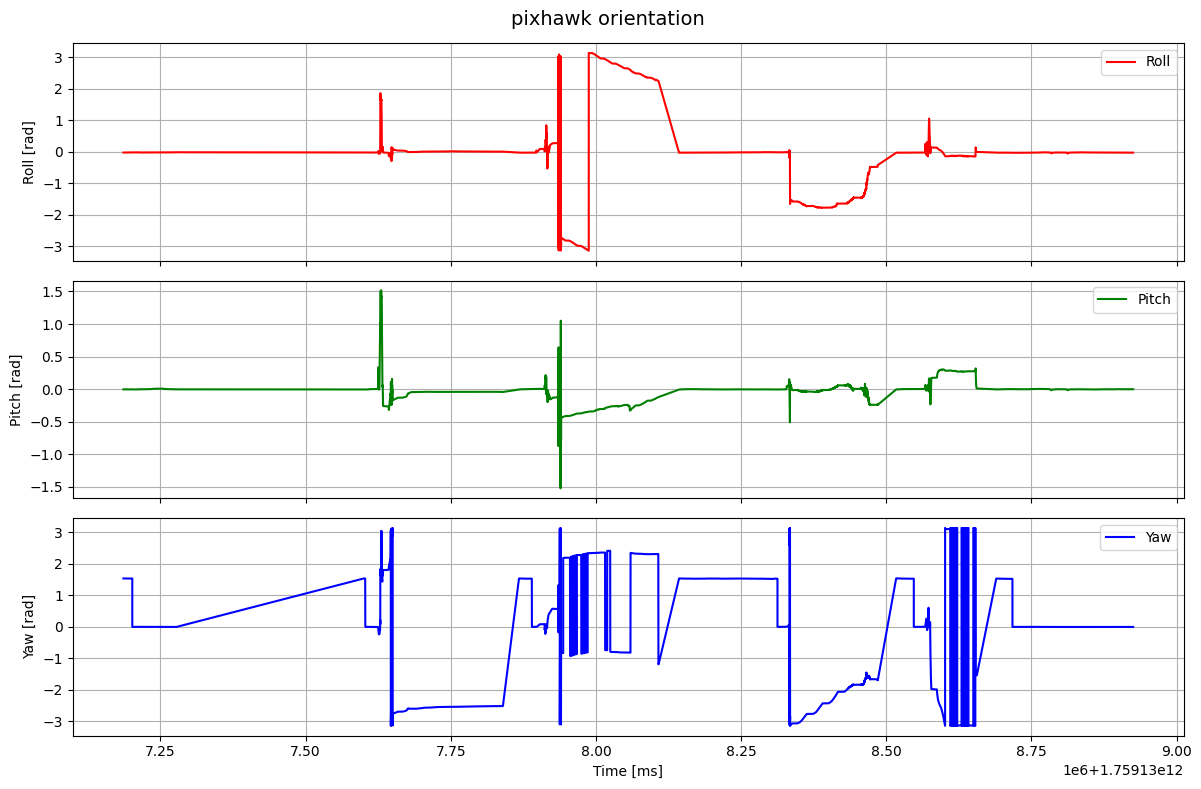

In [175]:
df2 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/pixhawk_odom.csv')
df2 = df2[df2['timestamp_us'] > 1e12]
df2[['roll', 'pitch', 'yaw']] = df2.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df2)
fig, (px_roll, px_pitch, px_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
px_roll.plot(df2['timestamp_us'], df2['roll'], label='Roll', color='r')
px_roll.set_ylabel("Roll [rad]")
px_roll.grid(True)
px_roll.legend()

# Pitch
px_pitch.plot(df2['timestamp_us'], df2['pitch'], label='Pitch', color='g')
px_pitch.set_ylabel("Pitch [rad]")
px_pitch.grid(True)
px_pitch.legend()

# Yaw
px_yaw.plot(df2['timestamp_us'], df2['yaw'], label='Yaw', color='b')
px_yaw.set_xlabel("Time [ms]")
px_yaw.set_ylabel("Yaw [rad]")
px_yaw.grid(True)
px_yaw.legend()

# タイトルを全体に
fig.suptitle("pixhawk orientation", fontsize=14)

plt.tight_layout()
plt.show()

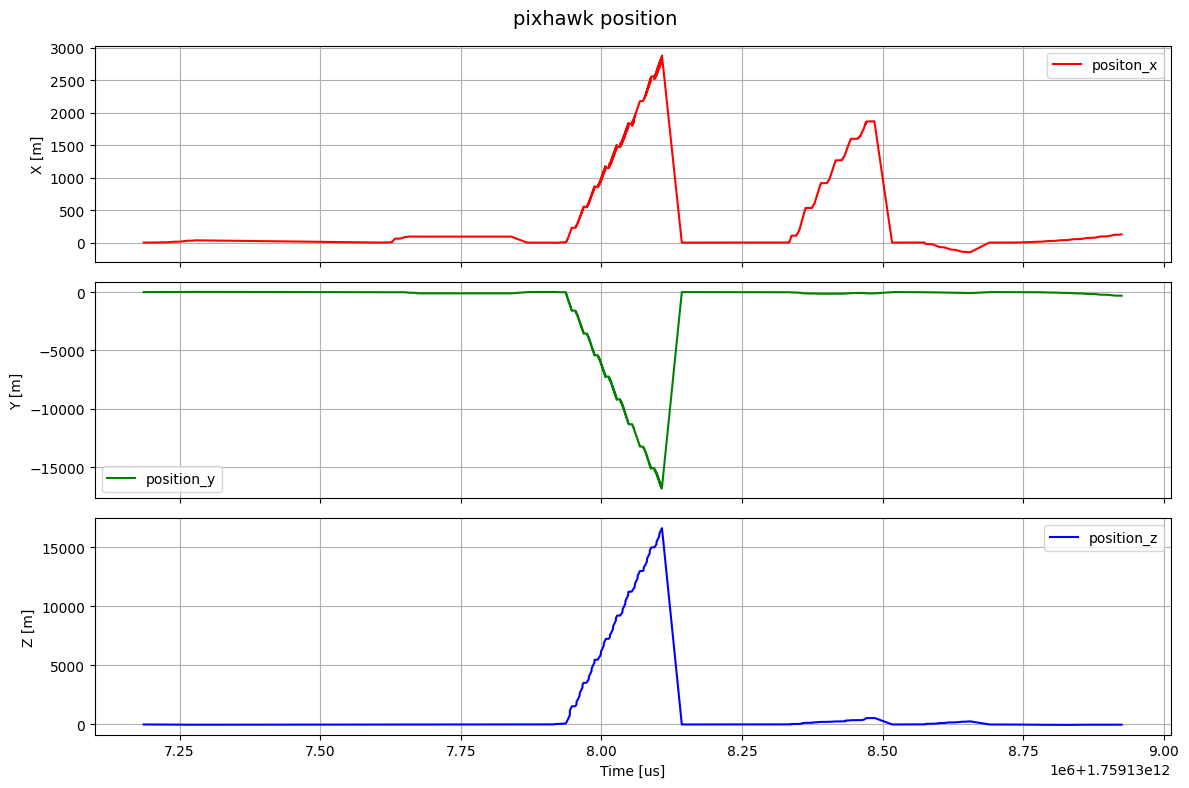

In [176]:
fig, (pix_px, pix_py, pix_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
pix_px.plot(df2['timestamp_us'], df2['px'], label='positon_x', color='r')
pix_px.set_ylabel("X [m]")
pix_px.grid(True)
pix_px.legend()

# Pitch
pix_py.plot(df2['timestamp_us'], df2['py'], label='position_y', color='g')
pix_py.set_ylabel("Y [m]")
pix_py.grid(True)
pix_py.legend()

# Yaw
pix_pz.plot(df2['timestamp_us'], df2['pz'], label='position_z', color='b')
pix_pz.set_xlabel("Time [us]")
pix_pz.set_ylabel("Z [m]")
pix_pz.grid(True)
pix_pz.legend()

# タイトルを全体に
fig.suptitle("pixhawk position", fontsize=14)

plt.tight_layout()
plt.show()

,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw
0,18722468,0.067893,-0.001042,0.003751,1.000000,-0.000919,0.000224,-0.000076,-0.001838,0.000448,-0.000153
1,18833511,0.067864,-0.000583,0.003845,1.000000,-0.000866,0.000110,-0.000078,-0.001732,0.000220,-0.000156
2,18981823,0.068500,-0.000154,0.004270,1.000000,-0.000846,0.000078,-0.000008,-0.001691,0.000157,-0.000016
3,19146494,0.069089,0.000514,0.004434,1.000000,-0.000692,0.000079,-0.000097,-0.001384,0.000157,-0.000193
4,19315442,0.069534,-0.000024,0.004377,1.000000,-0.000524,0.000071,-0.000069,-0.001048,0.000142,-0.000138
...,...,...,...,...,...,...,...,...,...,...,...
218,96153591,-0.809757,-0.096306,0.940598,0.991893,0.031350,0.121846,-0.017847,0.059662,0.245288,-0.028626
219,102213163,-0.903361,-0.123655,0.884582,0.974927,-0.170269,-0.143239,0.002897,-0.353859,-0.282033,0.056697
220,109311453,-1.024290,-0.118285,0.833713,0.830140,-0.388709,-0.399713,-0.001715,-1.039708,-0.727452,0.424920
221,115390979,-1.191770,-0.057469,0.700896,0.583012,-0.708111,-0.349073,-0.191894,-1.913191,-0.746116,0.377411


,timestamp_us,px,py,pz,qw,qx,qy,qz,roll,pitch,yaw


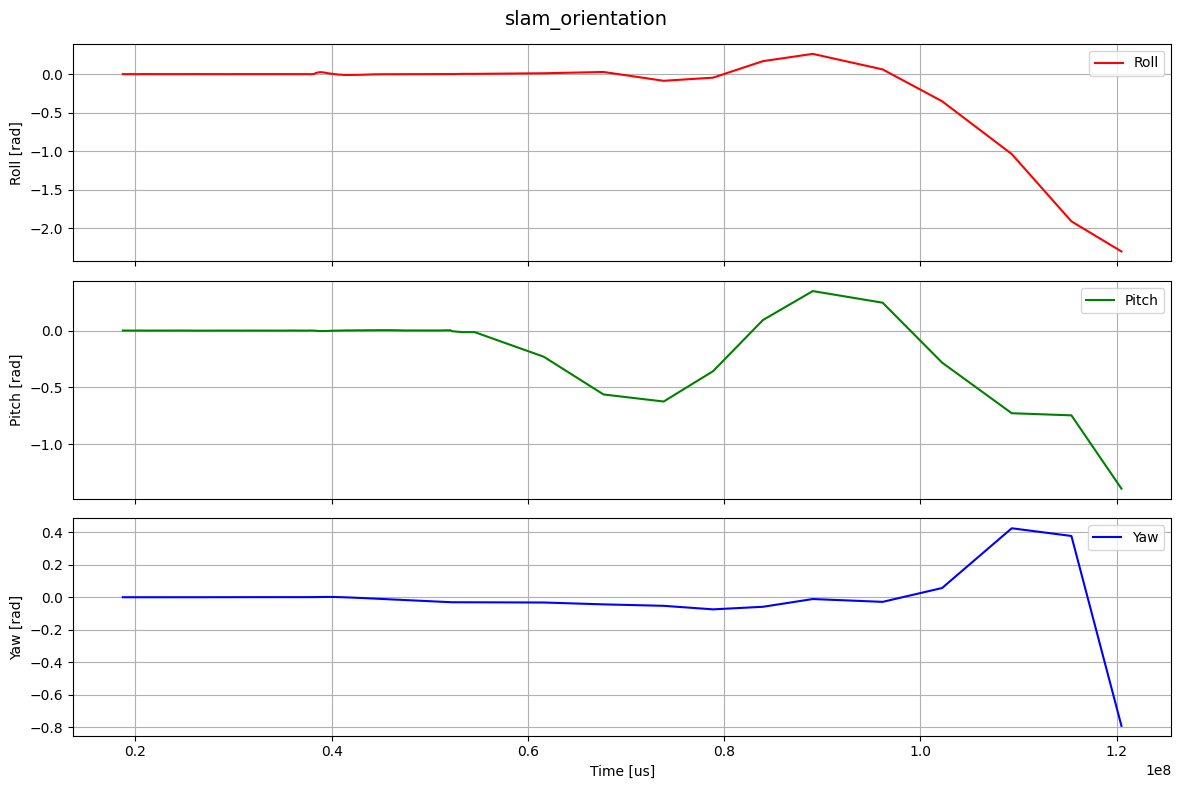

In [177]:
df3 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/slam_odom.csv')
# df3 = df3[df3['timestamp_us'] > 1e12]
df3[['roll', 'pitch', 'yaw']] = df3.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
display(df3)
display(df3[df3['yaw'] > 1.5])
fig, (sx_roll, sx_pitch, sx_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
sx_roll.plot(df3['timestamp_us'], df3['roll'], label='Roll', color='r')
sx_roll.set_ylabel("Roll [rad]")
sx_roll.grid(True)
sx_roll.legend()

# Pitch
sx_pitch.plot(df3['timestamp_us'], df3['pitch'], label='Pitch', color='g')
sx_pitch.set_ylabel("Pitch [rad]")
sx_pitch.grid(True)
sx_pitch.legend()

# Yaw
sx_yaw.plot(df3['timestamp_us'], df3['yaw'], label='Yaw', color='b')
sx_yaw.set_xlabel("Time [us]")
sx_yaw.set_ylabel("Yaw [rad]")
sx_yaw.grid(True)
sx_yaw.legend()

# タイトルを全体に
fig.suptitle("slam_orientation", fontsize=14)

plt.tight_layout()
plt.show()

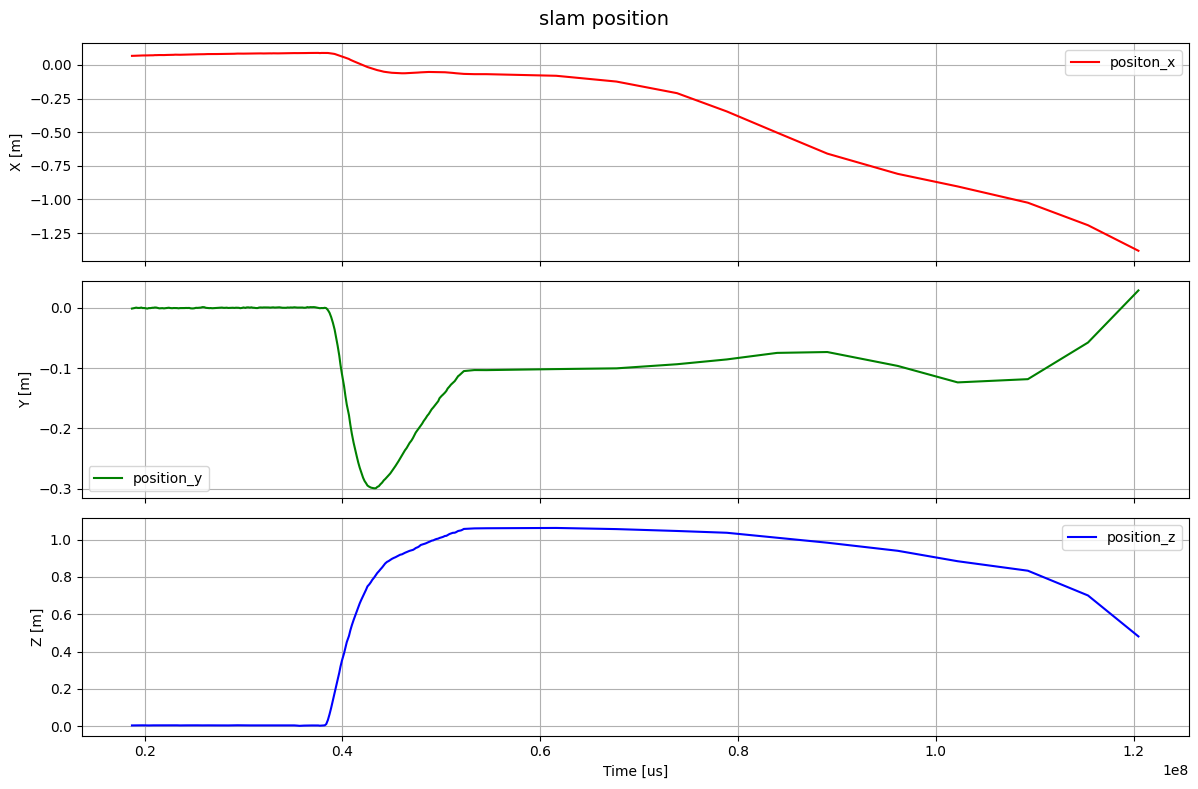

In [178]:
fig, (sx_px, sx_py, sx_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
sx_px.plot(df3['timestamp_us'], df3['px'], label='positon_x', color='r')
sx_px.set_ylabel("X [m]")
sx_px.grid(True)
sx_px.legend()

# Pitch
sx_py.plot(df3['timestamp_us'], df3['py'], label='position_y', color='g')
sx_py.set_ylabel("Y [m]")
sx_py.grid(True)
sx_py.legend()

# Yaw
sx_pz.plot(df3['timestamp_us'], df3['pz'], label='position_z', color='b')
sx_pz.set_xlabel("Time [us]")
sx_pz.set_ylabel("Z [m]")
sx_pz.grid(True)
sx_pz.legend()

# タイトルを全体に
fig.suptitle("slam position", fontsize=14)

plt.tight_layout()
plt.show()

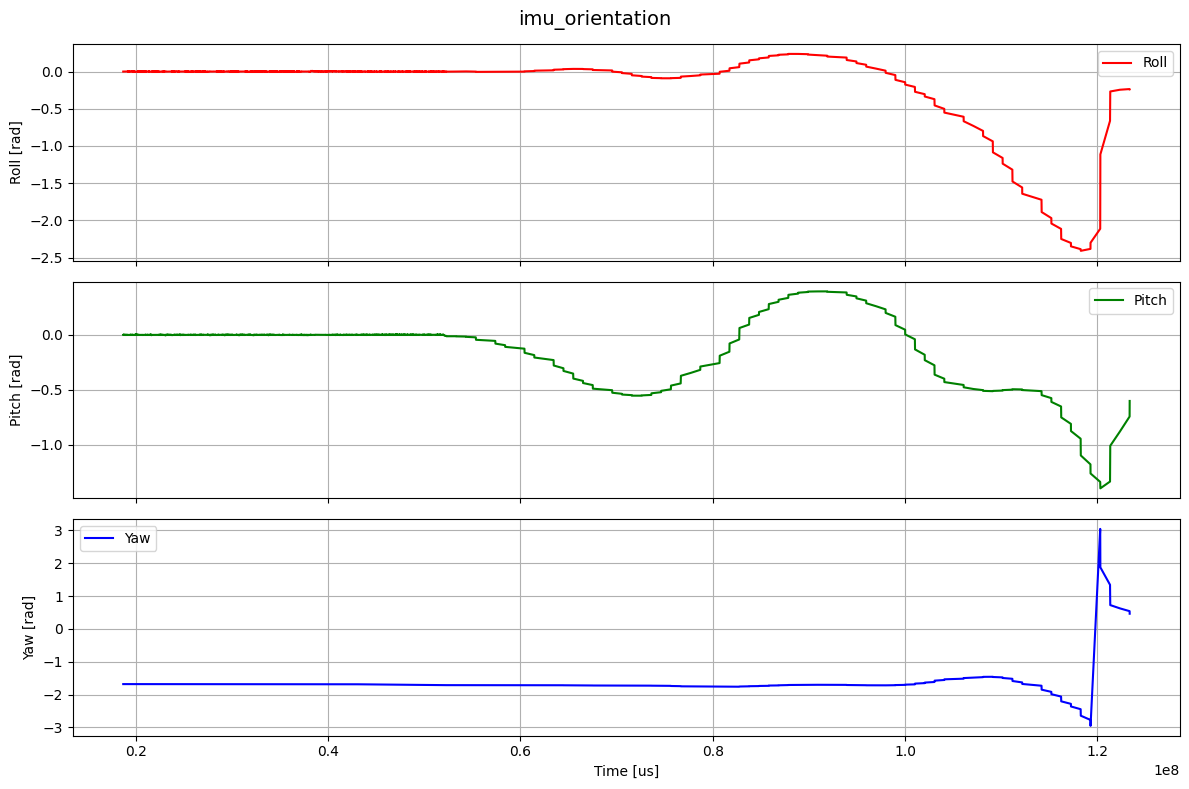

In [179]:
df4 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/madgwick_imu.csv')
df4[['roll', 'pitch', 'yaw']] = df4.apply(
    lambda row: pd.Series(quat_to_euler(row['qx'], row['qy'], row['qz'], row['qw'])),
    axis=1
)
fig, (ix_roll, ix_pitch, ix_yaw) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
ix_roll.plot(df4['timestamp_us'], df4['roll'], label='Roll', color='r')
ix_roll.set_ylabel("Roll [rad]")
ix_roll.grid(True)
ix_roll.legend()

# Pitch
ix_pitch.plot(df4['timestamp_us'], df4['pitch'], label='Pitch', color='g')
ix_pitch.set_ylabel("Pitch [rad]")
ix_pitch.grid(True)
ix_pitch.legend()

# Yaw
ix_yaw.plot(df4['timestamp_us'], df4['yaw'], label='Yaw', color='b')
ix_yaw.set_xlabel("Time [us]")
ix_yaw.set_ylabel("Yaw [rad]")
ix_yaw.grid(True)
ix_yaw.legend()

# タイトルを全体に
fig.suptitle("imu_orientation", fontsize=14)

plt.tight_layout()
plt.show()

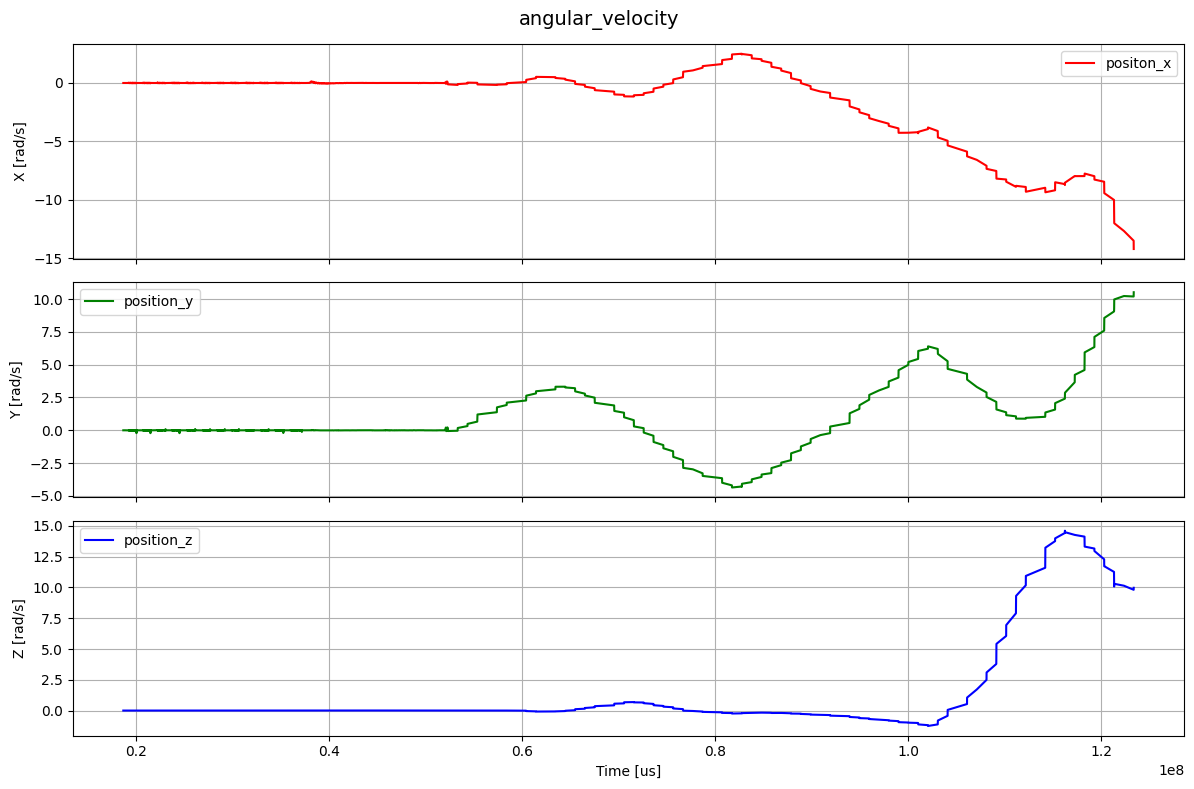

In [180]:
fig, (ix_px, ix_py, ix_pz) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ix_px.plot(df4['timestamp_us'], df4['avx'], label='positon_x', color='r')
ix_px.set_ylabel("X [rad/s]")
ix_px.grid(True)
ix_px.legend()

# Pitch
ix_py.plot(df4['timestamp_us'], df4['avy'], label='position_y', color='g')
ix_py.set_ylabel("Y [rad/s]")
ix_py.grid(True)
ix_py.legend()

# Yaw
ix_pz.plot(df4['timestamp_us'], df4['avz'], label='position_z', color='b')
ix_pz.set_xlabel("Time [us]")
ix_pz.set_ylabel("Z [rad/s]")
ix_pz.grid(True)
ix_pz.legend()

# タイトルを全体に
fig.suptitle("angular_velocity", fontsize=14)

plt.tight_layout()
plt.show()

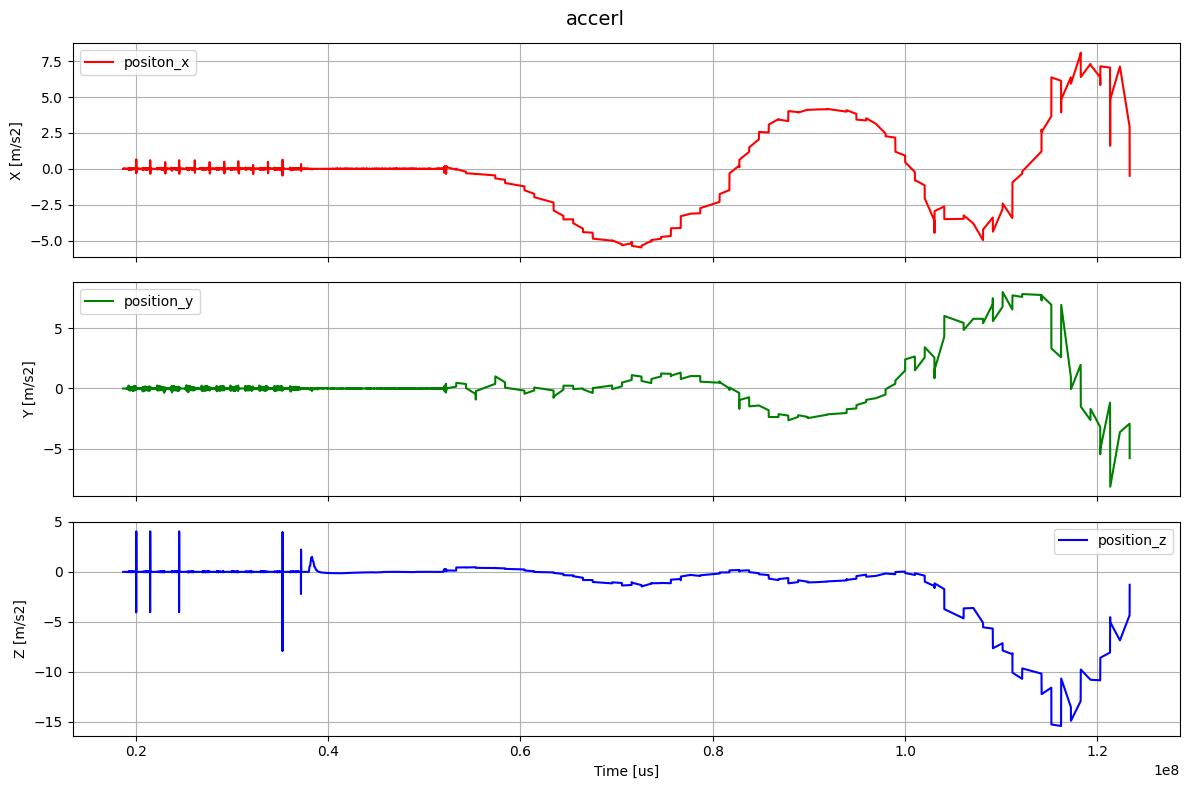

In [181]:
fig, (ax, ay, az) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Roll
ax.plot(df4['timestamp_us'], df4['ax'], label='positon_x', color='r')
ax.set_ylabel("X [m/s2]")
ax.grid(True)
ax.legend()

# Pitch
ay.plot(df4['timestamp_us'], df4['ay'], label='position_y', color='g')
ay.set_ylabel("Y [m/s2]")
ay.grid(True)
ay.legend()

# Yaw
az.plot(df4['timestamp_us'], df4['az'], label='position_z', color='b')
az.set_xlabel("Time [us]")
az.set_ylabel("Z [m/s2]")
az.grid(True)
az.legend()

# タイトルを全体に
fig.suptitle("accerl", fontsize=14)

plt.tight_layout()
plt.show()

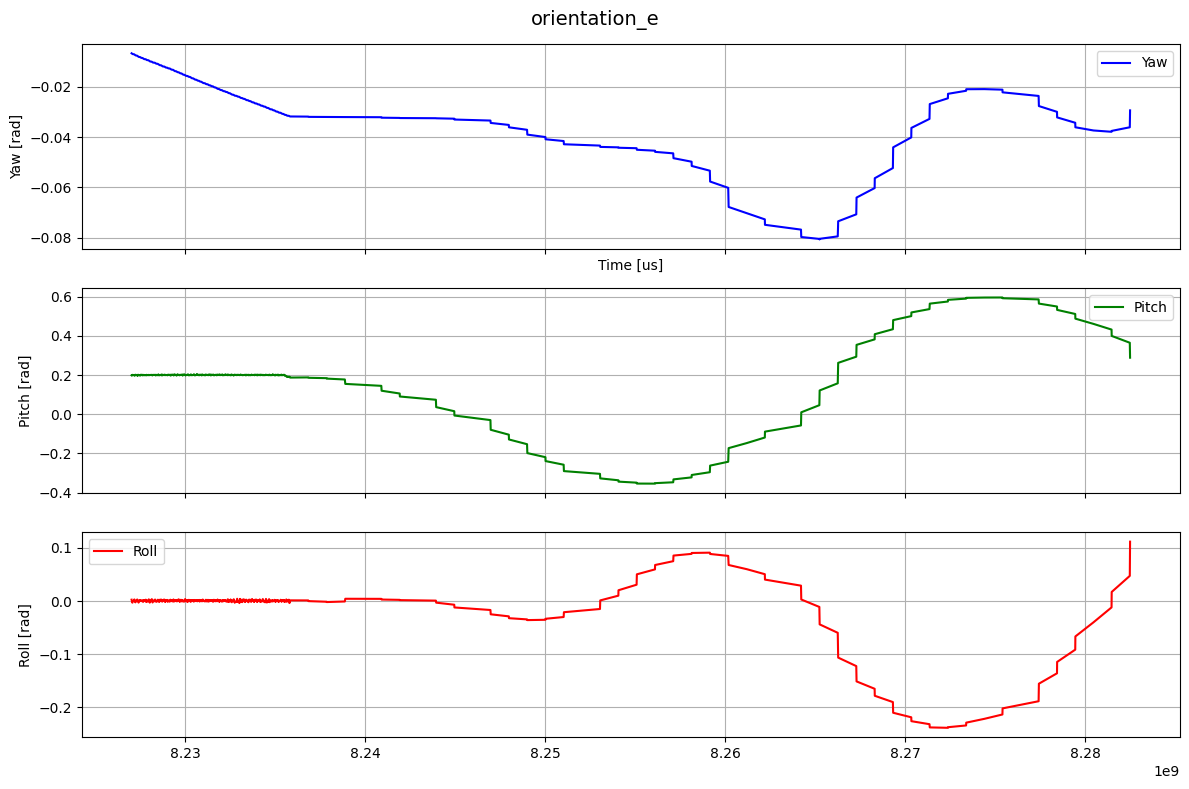

In [188]:
df5 = pd.read_csv('/home/ros2/ws_sensor_combined/src/px4_ros_com/csv/pid_log.csv')
df5 = df5[df5['timestamp_us'] > 8.227e9]
df5 = df5[df5['timestamp_us'] < 8.283e9]
fig, (yaw_e, pitch_e, roll_e) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
roll_e.plot(df5['timestamp_us'], df5['roll_err'], label='Roll', color='r')
roll_e.set_ylabel("Roll [rad]")
roll_e.grid(True)
roll_e.legend()

# Pitch
pitch_e.plot(df5['timestamp_us'], df5['pitch_err'], label='Pitch', color='g')
pitch_e.set_ylabel("Pitch [rad]")
pitch_e.grid(True)
pitch_e.legend()

# Yaw
yaw_e.plot(df5['timestamp_us'], df5['yaw_err'], label='Yaw', color='b')
yaw_e.set_xlabel("Time [us]")
yaw_e.set_ylabel("Yaw [rad]")
yaw_e.grid(True)
yaw_e.legend()

# タイトルを全体に
fig.suptitle("orientation_e", fontsize=14)

plt.tight_layout()
plt.show()

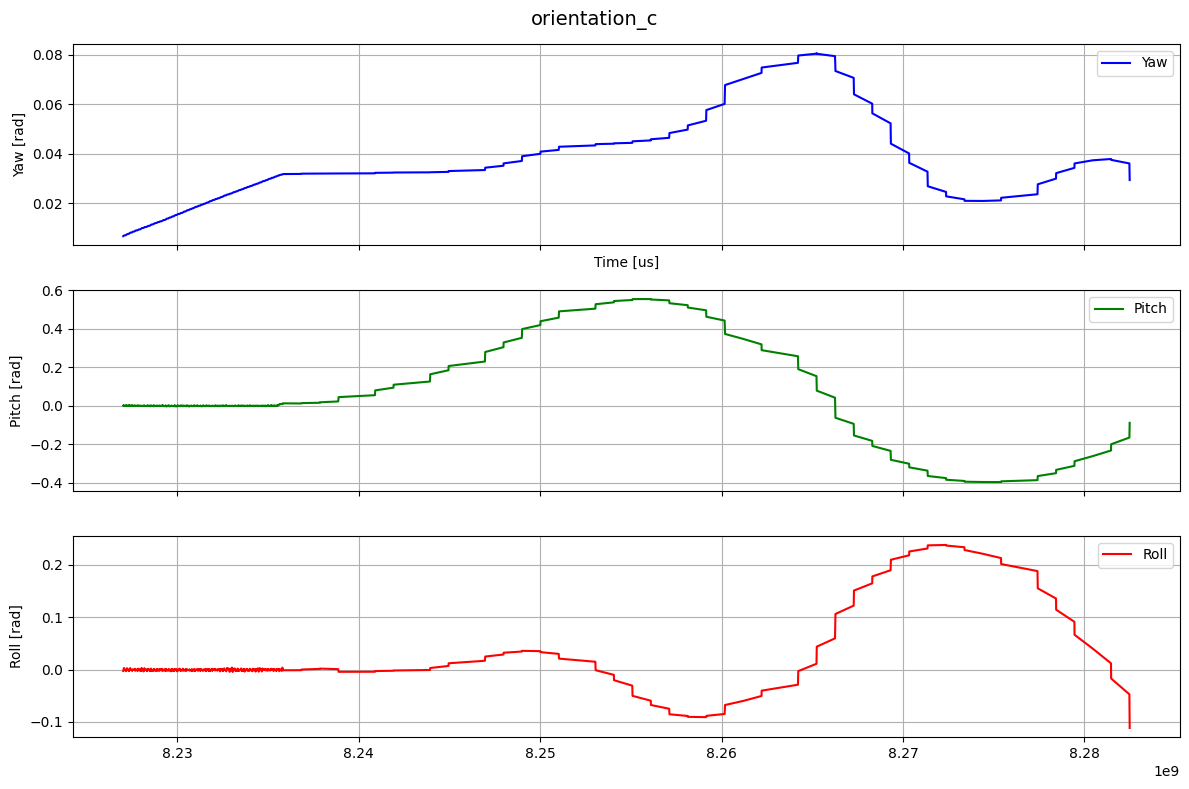

In [189]:
fig, (yaw_e, pitch_e, roll_e) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
roll_e.plot(df5['timestamp_us'], df5['curr_roll'], label='Roll', color='r')
roll_e.set_ylabel("Roll [rad]")
roll_e.grid(True)
roll_e.legend()

# Pitch
pitch_e.plot(df5['timestamp_us'], df5['curr_pitch'], label='Pitch', color='g')
pitch_e.set_ylabel("Pitch [rad]")
pitch_e.grid(True)
pitch_e.legend()

# Yaw
yaw_e.plot(df5['timestamp_us'], df5['curr_yaw'], label='Yaw', color='b')
yaw_e.set_xlabel("Time [us]")
yaw_e.set_ylabel("Yaw [rad]")
yaw_e.grid(True)
yaw_e.legend()

# タイトルを全体に
fig.suptitle("orientation_c", fontsize=14)

plt.tight_layout()
plt.show()

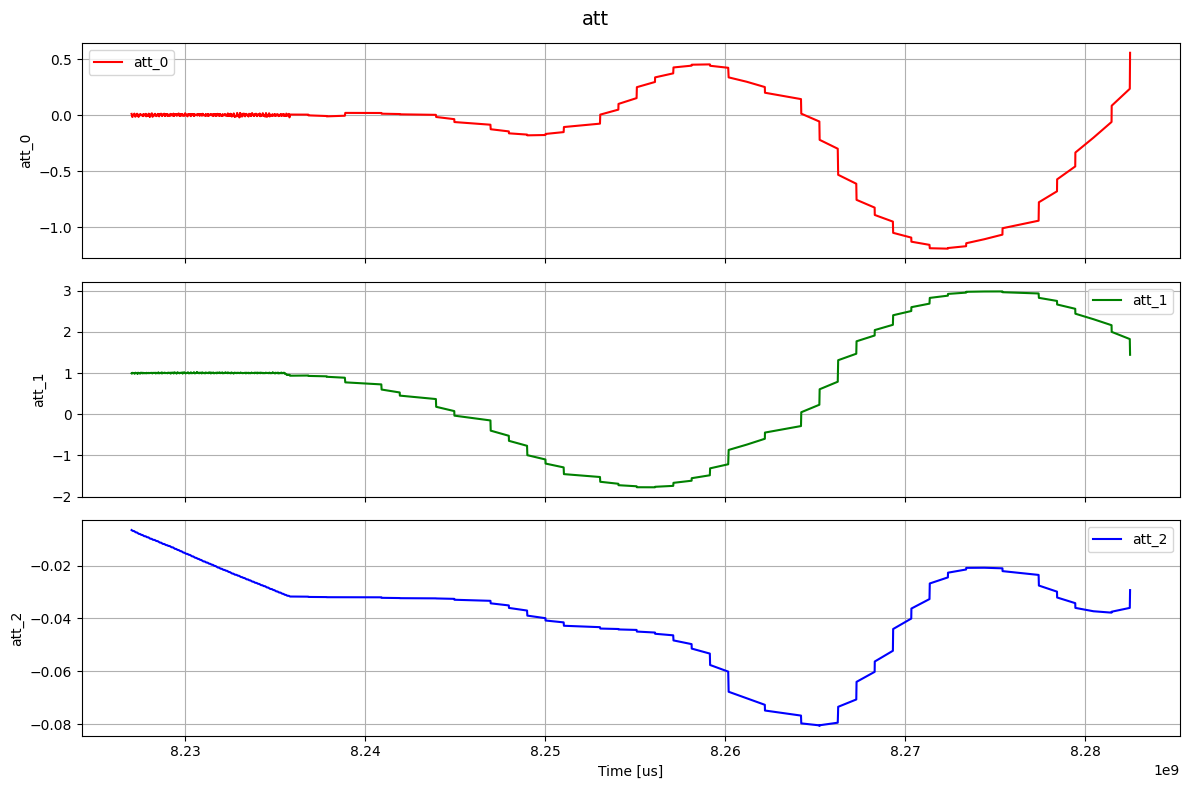

In [190]:
fig, (att_0, att_1, att_2) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
# Roll
att_0.plot(df5['timestamp_us'], df5['att_0'], label='att_0', color='r')
att_0.set_ylabel("att_0")
att_0.grid(True)
att_0.legend()

# Pitch
att_1.plot(df5['timestamp_us'], df5['att_1'], label='att_1', color='g')
att_1.set_ylabel("att_1")
att_1.grid(True)
att_1.legend()

# Yaw
att_2.plot(df5['timestamp_us'], df5['att_2'], label='att_2', color='b')
att_2.set_xlabel("Time [us]")
att_2.set_ylabel("att_2")
att_2.grid(True)
att_2.legend()

# タイトルを全体に
fig.suptitle("att", fontsize=14)

plt.tight_layout()
plt.show()

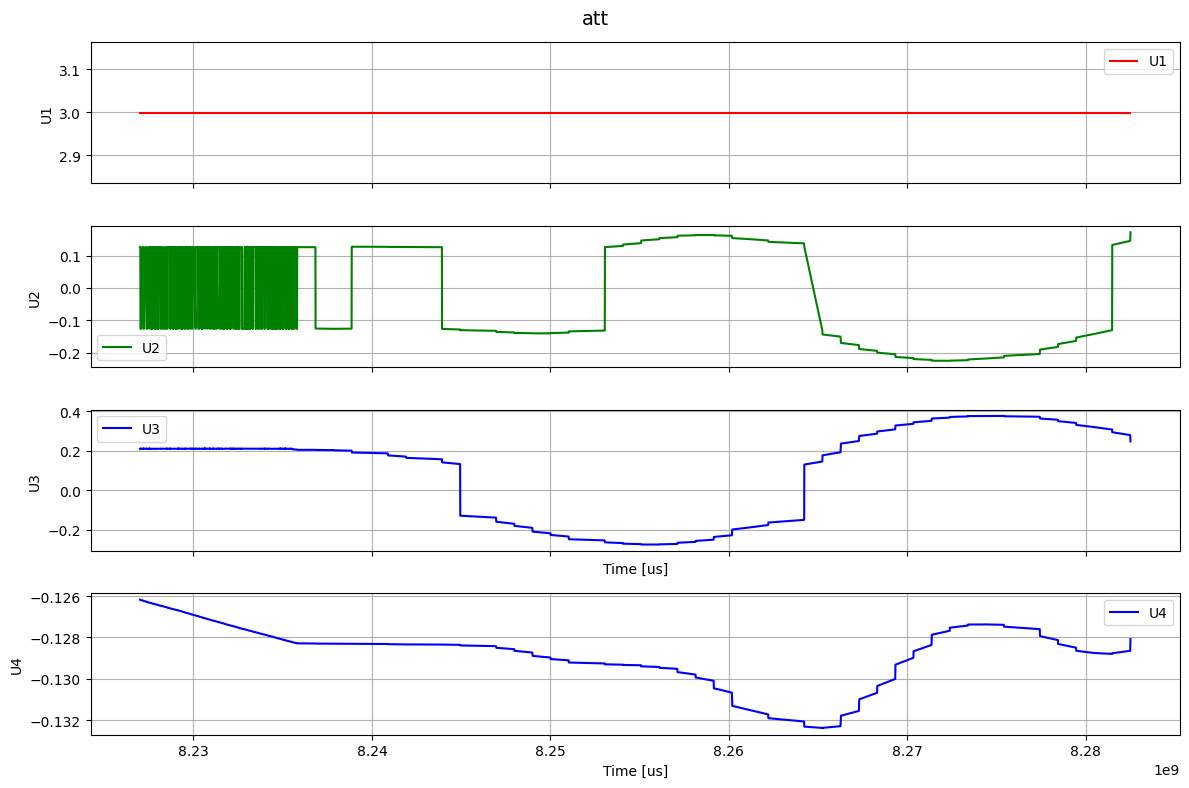

In [191]:
fig, (U1, U2, U3, U4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Roll
U1.plot(df5['timestamp_us'], df5['U1'], label='U1', color='r')
U1.set_ylabel("U1")
U1.grid(True)
U1.legend()

# Pitch
U2.plot(df5['timestamp_us'], df5['U2'], label='U2', color='g')
U2.set_ylabel("U2")
U2.grid(True)
U2.legend()

# Yaw
U3.plot(df5['timestamp_us'], df5['U3'], label='U3', color='b')
U3.set_xlabel("Time [us]")
U3.set_ylabel("U3")
U3.grid(True)
U3.legend()

U4.plot(df5['timestamp_us'], df5['U4'], label='U4', color='b')
U4.set_xlabel("Time [us]")
U4.set_ylabel("U4")
U4.grid(True)
U4.legend()

# タイトルを全体に
fig.suptitle("att", fontsize=14)

plt.tight_layout()
plt.show()

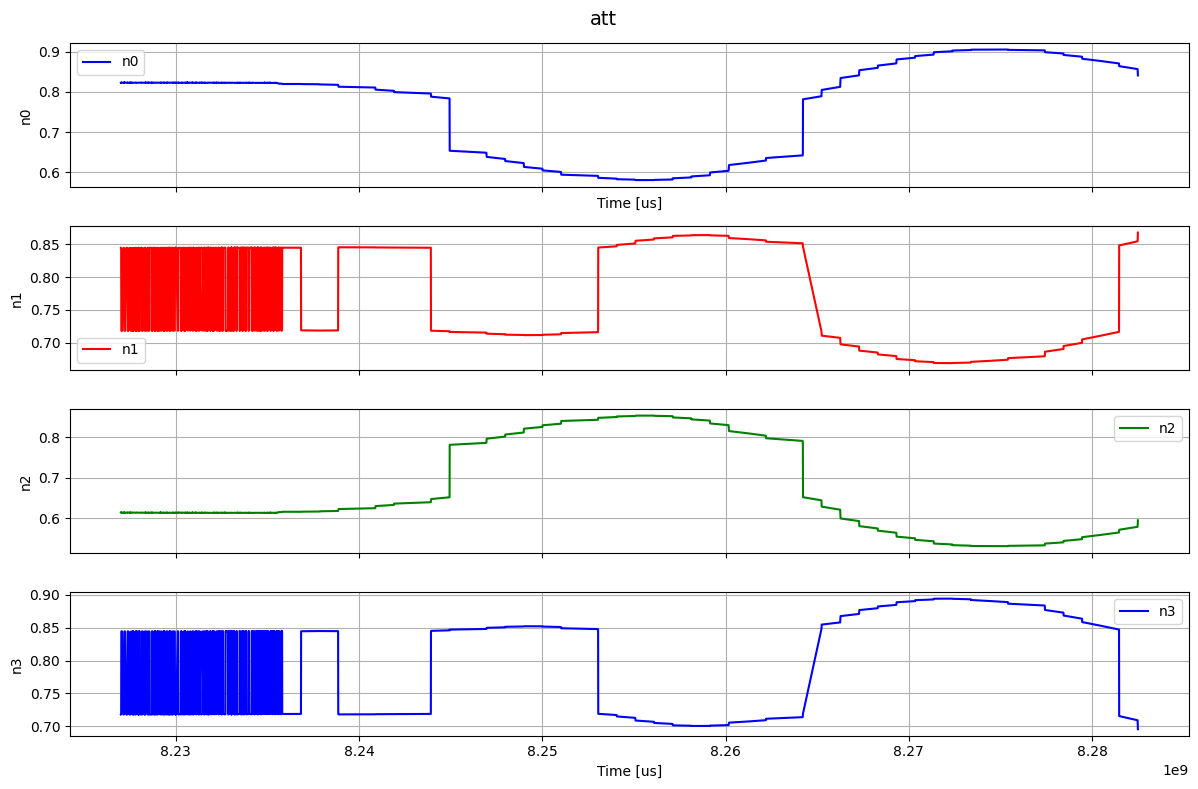

In [192]:
fig, (n0, n1, n2, n3) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
# Roll
n1.plot(df5['timestamp_us'], df5['n1'], label='n1', color='r')
n1.set_ylabel("n1")
n1.grid(True)
n1.legend()

# Pitch
n2.plot(df5['timestamp_us'], df5['n2'], label='n2', color='g')
n2.set_ylabel("n2")
n2.grid(True)
n2.legend()

# Yaw
n3.plot(df5['timestamp_us'], df5['n3'], label='n3', color='b')
n3.set_xlabel("Time [us]")
n3.set_ylabel("n3")
n3.grid(True)
n3.legend()

n0.plot(df5['timestamp_us'], df5['n0'], label='n0', color='b')
n0.set_xlabel("Time [us]")
n0.set_ylabel("n0")
n0.grid(True)
n0.legend()

# タイトルを全体に
fig.suptitle("att", fontsize=14)

plt.tight_layout()
plt.show()